In [1]:
!pip install tensorflow==2.4.1

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=76bfd7450ae717397abbb68f676f24a3b7eae4af7e0584d3baa50724038e3eed
  Stored in directory: c:\users\kaitl\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-win_amd64.whl size=38400 sha256=7a4d2f466195a01978440939e2de974b4cc5c3757f9d969b5687eee1496fe243
  Stored in directory: c:\users\kaitl\appdata\local\pip\cache\wheels\62\76\4c\aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built termcolor wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extens

You should consider upgrading via the 'c:\users\kaitl\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [54]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

from custom.iris_lm_depth import from_landmarks_to_depth
from videosource import FileSource, WebcamSource

In [55]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('folder') 

# Actions that we try to detect
actions = np.array(['yes', 'neutral','no' ])

# Thirty videos worth of data
no_sequences = 20

# Videos are going to be 30 frames in length
sequence_length = 50



In [56]:


mp_face_mesh = mp.solutions.face_mesh

left_eye_landmarks_id = np.array([33, 133])
right_eye_landmarks_id = np.array([362, 263])

dist_coeff = np.zeros((4, 1))

YELLOW = (0, 255, 255)
GREEN = (0, 255, 0)
BLUE = (255, 0, 0)
RED = (0, 0, 255)
SMALL_CIRCLE_SIZE = 1
LARGE_CIRCLE_SIZE = 2


LEFT_EYE_LANDMARKS_ID = np.array([33, 133])
RIGHT_EYE_LANDMARKS_ID = np.array([362, 263])

POINTS_IDX = [33, 133, 362, 263]
POINTS_IDX = list(set(POINTS_IDX))
POINTS_IDX.sort()


In [57]:

def __add_landmark_to_df(landmark, landmark_idx, df_headers, df_values):
    """Helper function that adds a landmark to the dataframe"""

    df_headers.append("x{}".format(landmark_idx))
    df_headers.append("y{}".format(landmark_idx))
    df_headers.append("z{}".format(landmark_idx))

    df_values.append(landmark[0])
    df_values.append(landmark[1])
    df_values.append(landmark[2])


In [58]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [59]:
label_map = {label:num for num, label in enumerate(actions)}


In [60]:
label_map

{'yes': 0, 'neutral': 1, 'no': 2}

In [61]:
def compareIrisLandmarks(irisLandmarks, eyeLandmarks, eyeAnchors):
    deltaVals = []
    for i in range(0, len(irisLandmarks), 3):
        x = irisLandmarks[i]
        y = irisLandmarks[i+1]
        z = irisLandmarks[i+2]
        
        #compare to 
        for j in range(0, len(eyeLandmarks), 3):
            x_c = eyeLandmarks[j]
            y_c = eyeLandmarks[j+1]
            z_c = eyeLandmarks[j+2]
            
            deltaVals.append(x - x_c)
            deltaVals.append(y - y_c)
            deltaVals.append(z - z_c)
        
        for j in range(0, len(eyeAnchors), 3):
            x_c = eyeLandmarks[j]
            y_c = eyeLandmarks[j+1]
            z_c = eyeLandmarks[j+2]
            
            deltaVals.append(x - x_c)
            deltaVals.append(y - y_c)
            deltaVals.append(z - z_c)
    return deltaVals

In [62]:
import math
def compareMidPointToLandMarks(midpoint, anchors):
    distances = []
    x = 0
    y = 1
    distances.append(math.sqrt((anchors[0+x]-midpoint[0+x])**2 + (anchors[0+y]-midpoint[0+y])**2))
    distances.append(math.sqrt((anchors[3+x]- midpoint[0+x])**2 + (anchors[3+y]-midpoint[0+y])**2))
    return distances

In [63]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(1, sequence_length) :
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            
            
            ### This is the New landmark points for only the bottom lid
            f1 = compareIrisLandmarks(res[462:477],res[235:262], res[0:6]) + compareIrisLandmarks(res[448:463],res[21:48],res[6:12])
#             f1 = compareMidPointToLandMarks(res[0:3], res[132:])
            window.append(f1)
        sequences.append(window)
        labels.append(label_map[action])

In [64]:
np.array(sequences).shape


(60, 49, 330)

In [65]:
np.array(labels).shape


(60,)

In [66]:
X = np.array(sequences)
X.shape


(60, 49, 330)

In [67]:
y = to_categorical(labels).astype(int)


In [68]:
y


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0,

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [70]:
y_test.shape

(3, 3)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [72]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [73]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(49, 330)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [74]:
res = [.7, 0.2, 0.1]


In [75]:
actions[np.argmax(res)]


'yes'

In [76]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [77]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
2/2 [==============================] - 7s 2s/step - loss: 1.0984 - categorical_accuracy: 0.3693
Epoch 2/2000
2/2 [==============================] - 0s 104ms/step - loss: 1.0894 - categorical_accuracy: 0.3693
Epoch 3/2000
2/2 [==============================] - 0s 92ms/step - loss: 1.0892 - categorical_accuracy: 0.3798
Epoch 4/2000
2/2 [==============================] - 0s 100ms/step - loss: 1.0368 - categorical_accuracy: 0.3589
Epoch 5/2000
2/2 [==============================] - 0s 88ms/step - loss: 1.0767 - categorical_accuracy: 0.3693
Epoch 6/2000
2/2 [==============================] - 0s 90ms/step - loss: 1.0886 - categorical_accuracy: 0.3485
Epoch 7/2000
2/2 [==============================] - 0s 126ms/step - loss: 1.0890 - categorical_accuracy: 0.3485
Epoch 8/2000
2/2 [==============================] - 0s 113ms/step - loss: 1.0864 - categorical_accuracy: 0.4512
Epoch 9/2000
2/2 [==============================] - 0s 180ms/step - loss: 1.0821 - categorical_accuracy: 0.449

2/2 [==============================] - 0s 105ms/step - loss: 1.0830 - categorical_accuracy: 0.3264
Epoch 74/2000
2/2 [==============================] - 0s 86ms/step - loss: 1.0746 - categorical_accuracy: 0.3472
Epoch 75/2000
2/2 [==============================] - 0s 87ms/step - loss: 1.0576 - categorical_accuracy: 0.3914
Epoch 76/2000
2/2 [==============================] - 0s 87ms/step - loss: 1.0275 - categorical_accuracy: 0.4161
Epoch 77/2000
2/2 [==============================] - 0s 141ms/step - loss: 1.4554 - categorical_accuracy: 0.2926
Epoch 78/2000
2/2 [==============================] - 0s 110ms/step - loss: 1.1232 - categorical_accuracy: 0.3277
Epoch 79/2000
2/2 [==============================] - 0s 106ms/step - loss: 1.0838 - categorical_accuracy: 0.3485
Epoch 80/2000
2/2 [==============================] - 0s 113ms/step - loss: 1.0654 - categorical_accuracy: 0.3589
Epoch 81/2000
2/2 [==============================] - 0s 131ms/step - loss: 1.0684 - categorical_accuracy: 0.3589


2/2 [==============================] - 0s 87ms/step - loss: 298899.8854 - categorical_accuracy: 0.3394
Epoch 146/2000
2/2 [==============================] - 0s 80ms/step - loss: 383832.3333 - categorical_accuracy: 0.3043
Epoch 147/2000
2/2 [==============================] - 0s 102ms/step - loss: 555076.6667 - categorical_accuracy: 0.3355
Epoch 148/2000
2/2 [==============================] - 0s 96ms/step - loss: 223107.7031 - categorical_accuracy: 0.4370
Epoch 149/2000
2/2 [==============================] - 0s 123ms/step - loss: 267694.2917 - categorical_accuracy: 0.3589
Epoch 150/2000
2/2 [==============================] - 0s 120ms/step - loss: 89820.4844 - categorical_accuracy: 0.3485
Epoch 151/2000
2/2 [==============================] - 0s 113ms/step - loss: 526783.1667 - categorical_accuracy: 0.2926
Epoch 152/2000
2/2 [==============================] - 0s 110ms/step - loss: 927645.8750 - categorical_accuracy: 0.3576
Epoch 153/2000
2/2 [==============================] - 0s 114ms/step

2/2 [==============================] - 0s 84ms/step - loss: 350.1462 - categorical_accuracy: 0.3589
Epoch 216/2000
2/2 [==============================] - 0s 98ms/step - loss: 567.0056 - categorical_accuracy: 0.3576
Epoch 217/2000
2/2 [==============================] - 0s 108ms/step - loss: 415.9115 - categorical_accuracy: 0.3785
Epoch 218/2000
2/2 [==============================] - 0s 100ms/step - loss: 465.7383 - categorical_accuracy: 0.3030
Epoch 219/2000
2/2 [==============================] - 0s 130ms/step - loss: 2546.3730 - categorical_accuracy: 0.3043
Epoch 220/2000
2/2 [==============================] - 0s 113ms/step - loss: 1920.5210 - categorical_accuracy: 0.3173
Epoch 221/2000
2/2 [==============================] - 0s 103ms/step - loss: 1374.9763 - categorical_accuracy: 0.3368
Epoch 222/2000
2/2 [==============================] - 0s 102ms/step - loss: 1091.0414 - categorical_accuracy: 0.3355
Epoch 223/2000
2/2 [==============================] - 0s 89ms/step - loss: 920.7384 -

2/2 [==============================] - 0s 96ms/step - loss: 10099.7166 - categorical_accuracy: 0.3355
Epoch 286/2000
2/2 [==============================] - 0s 96ms/step - loss: 9159.0941 - categorical_accuracy: 0.3030
Epoch 287/2000
2/2 [==============================] - 0s 109ms/step - loss: 11131.4339 - categorical_accuracy: 0.3355
Epoch 288/2000
2/2 [==============================] - 0s 111ms/step - loss: 6089.1017 - categorical_accuracy: 0.3472
Epoch 289/2000
2/2 [==============================] - 0s 97ms/step - loss: 4682.0304 - categorical_accuracy: 0.3472
Epoch 290/2000
2/2 [==============================] - 0s 112ms/step - loss: 3584.5177 - categorical_accuracy: 0.3068
Epoch 291/2000
2/2 [==============================] - 0s 95ms/step - loss: 3929.0884 - categorical_accuracy: 0.4227
Epoch 292/2000
2/2 [==============================] - 0s 81ms/step - loss: 5102.8792 - categorical_accuracy: 0.3706
Epoch 293/2000
2/2 [==============================] - 0s 83ms/step - loss: 2072.02

Epoch 356/2000
2/2 [==============================] - 0s 110ms/step - loss: 216.8970 - categorical_accuracy: 0.3485
Epoch 357/2000
2/2 [==============================] - 0s 94ms/step - loss: 150.6328 - categorical_accuracy: 0.3564
Epoch 358/2000
2/2 [==============================] - 0s 100ms/step - loss: 338.6454 - categorical_accuracy: 0.3264
Epoch 359/2000
2/2 [==============================] - 0s 104ms/step - loss: 210.7815 - categorical_accuracy: 0.3927
Epoch 360/2000
2/2 [==============================] - 0s 83ms/step - loss: 328.0350 - categorical_accuracy: 0.3485
Epoch 361/2000
2/2 [==============================] - 0s 85ms/step - loss: 594.7119 - categorical_accuracy: 0.3251
Epoch 362/2000
2/2 [==============================] - 0s 111ms/step - loss: 316.7220 - categorical_accuracy: 0.3147
Epoch 363/2000
2/2 [==============================] - 0s 82ms/step - loss: 440.6216 - categorical_accuracy: 0.3056
Epoch 364/2000
2/2 [==============================] - 0s 86ms/step - loss: 6

2/2 [==============================] - 0s 85ms/step - loss: 194.0949 - categorical_accuracy: 0.3043
Epoch 428/2000
2/2 [==============================] - 0s 128ms/step - loss: 111.1400 - categorical_accuracy: 0.3589
Epoch 429/2000
2/2 [==============================] - 0s 181ms/step - loss: 106.7468 - categorical_accuracy: 0.3472
Epoch 430/2000
2/2 [==============================] - 0s 222ms/step - loss: 111.0125 - categorical_accuracy: 0.3264
Epoch 431/2000
2/2 [==============================] - 0s 94ms/step - loss: 119.7060 - categorical_accuracy: 0.3043
Epoch 432/2000
2/2 [==============================] - 0s 148ms/step - loss: 156.8030 - categorical_accuracy: 0.3381
Epoch 433/2000
2/2 [==============================] - 0s 214ms/step - loss: 109.0448 - categorical_accuracy: 0.3030
Epoch 434/2000
2/2 [==============================] - 0s 190ms/step - loss: 32.3709 - categorical_accuracy: 0.4616
Epoch 435/2000
2/2 [==============================] - 0s 192ms/step - loss: 152.7401 - cat

2/2 [==============================] - 0s 76ms/step - loss: 53.5821 - categorical_accuracy: 0.3589
Epoch 499/2000
2/2 [==============================] - 0s 102ms/step - loss: 51.8925 - categorical_accuracy: 0.3706
Epoch 500/2000
2/2 [==============================] - 0s 82ms/step - loss: 48.3600 - categorical_accuracy: 0.3668
Epoch 501/2000
2/2 [==============================] - 0s 100ms/step - loss: 92.5299 - categorical_accuracy: 0.3368
Epoch 502/2000
2/2 [==============================] - 0s 81ms/step - loss: 91.4737 - categorical_accuracy: 0.3264
Epoch 503/2000
2/2 [==============================] - 0s 82ms/step - loss: 127.8397 - categorical_accuracy: 0.3485
Epoch 504/2000
2/2 [==============================] - 0s 99ms/step - loss: 79.0491 - categorical_accuracy: 0.3485
Epoch 505/2000
2/2 [==============================] - 0s 96ms/step - loss: 85.2951 - categorical_accuracy: 0.3147
Epoch 506/2000
2/2 [==============================] - 0s 131ms/step - loss: 90.0882 - categorical_ac

2/2 [==============================] - 0s 89ms/step - loss: 377.0031 - categorical_accuracy: 0.3043
Epoch 569/2000
2/2 [==============================] - 0s 82ms/step - loss: 644.9851 - categorical_accuracy: 0.3472
Epoch 570/2000
2/2 [==============================] - 0s 80ms/step - loss: 668.4918 - categorical_accuracy: 0.3147
Epoch 571/2000
2/2 [==============================] - 0s 100ms/step - loss: 670.2484 - categorical_accuracy: 0.3719
Epoch 572/2000
2/2 [==============================] - 0s 84ms/step - loss: 1300.9939 - categorical_accuracy: 0.3589
Epoch 573/2000
2/2 [==============================] - 0s 82ms/step - loss: 966.9858 - categorical_accuracy: 0.3381
Epoch 574/2000
2/2 [==============================] - 0s 83ms/step - loss: 635.4635 - categorical_accuracy: 0.3368
Epoch 575/2000
2/2 [==============================] - 0s 101ms/step - loss: 734.9236 - categorical_accuracy: 0.3368
Epoch 576/2000
2/2 [==============================] - 0s 109ms/step - loss: 554.7323 - categ

2/2 [==============================] - 0s 83ms/step - loss: 45.8407 - categorical_accuracy: 0.3681
Epoch 640/2000
2/2 [==============================] - 0s 90ms/step - loss: 80.8584 - categorical_accuracy: 0.3485
Epoch 641/2000
2/2 [==============================] - 0s 105ms/step - loss: 46.5830 - categorical_accuracy: 0.3264
Epoch 642/2000
2/2 [==============================] - 0s 122ms/step - loss: 45.5136 - categorical_accuracy: 0.2926
Epoch 643/2000
2/2 [==============================] - 0s 122ms/step - loss: 37.8044 - categorical_accuracy: 0.3719
Epoch 644/2000
2/2 [==============================] - 0s 99ms/step - loss: 24.4878 - categorical_accuracy: 0.3381
Epoch 645/2000
2/2 [==============================] - 0s 95ms/step - loss: 35.9724 - categorical_accuracy: 0.3160
Epoch 646/2000
2/2 [==============================] - 0s 90ms/step - loss: 40.5670 - categorical_accuracy: 0.3472
Epoch 647/2000
2/2 [==============================] - 0s 123ms/step - loss: 47.3398 - categorical_ac

2/2 [==============================] - 0s 105ms/step - loss: 59.2823 - categorical_accuracy: 0.4031
Epoch 711/2000
2/2 [==============================] - 0s 82ms/step - loss: 24.6688 - categorical_accuracy: 0.3381
Epoch 712/2000
2/2 [==============================] - 0s 95ms/step - loss: 81.6616 - categorical_accuracy: 0.3576
Epoch 713/2000
2/2 [==============================] - 0s 78ms/step - loss: 67.9421 - categorical_accuracy: 0.3147
Epoch 714/2000
2/2 [==============================] - 0s 117ms/step - loss: 108.1989 - categorical_accuracy: 0.3381
Epoch 715/2000
2/2 [==============================] - 0s 108ms/step - loss: 69.4003 - categorical_accuracy: 0.3147
Epoch 716/2000
2/2 [==============================] - 0s 101ms/step - loss: 49.9348 - categorical_accuracy: 0.3147
Epoch 717/2000
2/2 [==============================] - 0s 107ms/step - loss: 38.7030 - categorical_accuracy: 0.2926
Epoch 718/2000
2/2 [==============================] - 0s 123ms/step - loss: 71.1094 - categorical

2/2 [==============================] - 0s 148ms/step - loss: 36.9482 - categorical_accuracy: 0.3043
Epoch 782/2000
2/2 [==============================] - 0s 180ms/step - loss: 21.3433 - categorical_accuracy: 0.3030
Epoch 783/2000
2/2 [==============================] - 0s 174ms/step - loss: 39.3049 - categorical_accuracy: 0.3277
Epoch 784/2000
2/2 [==============================] - 0s 119ms/step - loss: 39.5684 - categorical_accuracy: 0.3927
Epoch 785/2000
2/2 [==============================] - 0s 195ms/step - loss: 66.5962 - categorical_accuracy: 0.3251
Epoch 786/2000
2/2 [==============================] - 0s 158ms/step - loss: 42.6634 - categorical_accuracy: 0.3277
Epoch 787/2000
2/2 [==============================] - 0s 196ms/step - loss: 68.0304 - categorical_accuracy: 0.3589
Epoch 788/2000
2/2 [==============================] - 0s 203ms/step - loss: 64.4794 - categorical_accuracy: 0.2926
Epoch 789/2000
2/2 [==============================] - 0s 186ms/step - loss: 31.4200 - categoric

2/2 [==============================] - 0s 99ms/step - loss: 15.0303 - categorical_accuracy: 0.4161
Epoch 853/2000
2/2 [==============================] - 0s 110ms/step - loss: 24.7851 - categorical_accuracy: 0.3719
Epoch 854/2000
2/2 [==============================] - 0s 101ms/step - loss: 10.1053 - categorical_accuracy: 0.4903
Epoch 855/2000
2/2 [==============================] - 0s 84ms/step - loss: 37.7651 - categorical_accuracy: 0.3043
Epoch 856/2000
2/2 [==============================] - 0s 112ms/step - loss: 61.8062 - categorical_accuracy: 0.2951
Epoch 857/2000
2/2 [==============================] - 0s 97ms/step - loss: 30.3990 - categorical_accuracy: 0.3485
Epoch 858/2000
2/2 [==============================] - 0s 105ms/step - loss: 26.4791 - categorical_accuracy: 0.3043
Epoch 859/2000
2/2 [==============================] - 0s 105ms/step - loss: 35.2424 - categorical_accuracy: 0.2029
Epoch 860/2000
2/2 [==============================] - 0s 86ms/step - loss: 39.6941 - categorical_a

2/2 [==============================] - 0s 104ms/step - loss: 28.6892 - categorical_accuracy: 0.3498
Epoch 924/2000
2/2 [==============================] - 0s 98ms/step - loss: 12.0678 - categorical_accuracy: 0.3147
Epoch 925/2000
2/2 [==============================] - 0s 102ms/step - loss: 9.7816 - categorical_accuracy: 0.4929
Epoch 926/2000
2/2 [==============================] - 0s 105ms/step - loss: 20.2910 - categorical_accuracy: 0.3719
Epoch 927/2000
2/2 [==============================] - 0s 82ms/step - loss: 13.0252 - categorical_accuracy: 0.3472
Epoch 928/2000
2/2 [==============================] - 0s 87ms/step - loss: 18.3298 - categorical_accuracy: 0.3485
Epoch 929/2000
2/2 [==============================] - 0s 110ms/step - loss: 27.7177 - categorical_accuracy: 0.2809
Epoch 930/2000
2/2 [==============================] - 0s 94ms/step - loss: 31.2497 - categorical_accuracy: 0.2926
Epoch 931/2000
2/2 [==============================] - 0s 131ms/step - loss: 16.6756 - categorical_ac

2/2 [==============================] - 0s 101ms/step - loss: 65.4471 - categorical_accuracy: 0.3030
Epoch 995/2000
2/2 [==============================] - 0s 93ms/step - loss: 65.1478 - categorical_accuracy: 0.4499
Epoch 996/2000
2/2 [==============================] - 0s 84ms/step - loss: 39.8896 - categorical_accuracy: 0.2484
Epoch 997/2000
2/2 [==============================] - 0s 85ms/step - loss: 65.6510 - categorical_accuracy: 0.3264
Epoch 998/2000
2/2 [==============================] - 0s 83ms/step - loss: 28.8187 - categorical_accuracy: 0.4825
Epoch 999/2000
2/2 [==============================] - 0s 104ms/step - loss: 58.4840 - categorical_accuracy: 0.3043
Epoch 1000/2000
2/2 [==============================] - 0s 108ms/step - loss: 59.2198 - categorical_accuracy: 0.3668
Epoch 1001/2000
2/2 [==============================] - 0s 109ms/step - loss: 58.8058 - categorical_accuracy: 0.3902
Epoch 1002/2000
2/2 [==============================] - 0s 105ms/step - loss: 77.8157 - categorica

2/2 [==============================] - 0s 108ms/step - loss: 63.2607 - categorical_accuracy: 0.3693
Epoch 1065/2000
2/2 [==============================] - 0s 111ms/step - loss: 70.6532 - categorical_accuracy: 0.3251
Epoch 1066/2000
2/2 [==============================] - 0s 97ms/step - loss: 61.1033 - categorical_accuracy: 0.3381
Epoch 1067/2000
2/2 [==============================] - 0s 95ms/step - loss: 45.5632 - categorical_accuracy: 0.3056
Epoch 1068/2000
2/2 [==============================] - 0s 108ms/step - loss: 29.0110 - categorical_accuracy: 0.3836
Epoch 1069/2000
2/2 [==============================] - 0s 83ms/step - loss: 44.1408 - categorical_accuracy: 0.3147
Epoch 1070/2000
2/2 [==============================] - 0s 116ms/step - loss: 57.5193 - categorical_accuracy: 0.3173
Epoch 1071/2000
2/2 [==============================] - 0s 103ms/step - loss: 20.8920 - categorical_accuracy: 0.4019
Epoch 1072/2000
2/2 [==============================] - 0s 101ms/step - loss: 36.1201 - cate

2/2 [==============================] - 0s 102ms/step - loss: 26.8044 - categorical_accuracy: 0.3381
Epoch 1135/2000
2/2 [==============================] - 0s 107ms/step - loss: 44.4222 - categorical_accuracy: 0.3589
Epoch 1136/2000
2/2 [==============================] - 0s 86ms/step - loss: 67.2669 - categorical_accuracy: 0.2834
Epoch 1137/2000
2/2 [==============================] - 0s 98ms/step - loss: 33.3206 - categorical_accuracy: 0.3589
Epoch 1138/2000
2/2 [==============================] - ETA: 0s - loss: 36.9636 - categorical_accuracy: 0.369 - 0s 83ms/step - loss: 37.8981 - categorical_accuracy: 0.3576
Epoch 1139/2000
2/2 [==============================] - 0s 82ms/step - loss: 45.9702 - categorical_accuracy: 0.3043
Epoch 1140/2000
2/2 [==============================] - 0s 86ms/step - loss: 16.9258 - categorical_accuracy: 0.3589
Epoch 1141/2000
2/2 [==============================] - 0s 94ms/step - loss: 45.9000 - categorical_accuracy: 0.3173
Epoch 1142/2000
2/2 [=================

2/2 [==============================] - 0s 86ms/step - loss: 40.0904 - categorical_accuracy: 0.3394
Epoch 1205/2000
2/2 [==============================] - 0s 83ms/step - loss: 30.6552 - categorical_accuracy: 0.3394
Epoch 1206/2000
2/2 [==============================] - 0s 103ms/step - loss: 12.9407 - categorical_accuracy: 0.3251
Epoch 1207/2000
2/2 [==============================] - 0s 84ms/step - loss: 35.7054 - categorical_accuracy: 0.3576
Epoch 1208/2000
2/2 [==============================] - 0s 82ms/step - loss: 36.0418 - categorical_accuracy: 0.3147
Epoch 1209/2000
2/2 [==============================] - 0s 92ms/step - loss: 29.4641 - categorical_accuracy: 0.3589
Epoch 1210/2000
2/2 [==============================] - 0s 79ms/step - loss: 16.7987 - categorical_accuracy: 0.3472
Epoch 1211/2000
2/2 [==============================] - 0s 112ms/step - loss: 17.9343 - categorical_accuracy: 0.3277
Epoch 1212/2000
2/2 [==============================] - 0s 115ms/step - loss: 21.8622 - categor

2/2 [==============================] - 0s 89ms/step - loss: 8.4061 - categorical_accuracy: 0.3719
Epoch 1275/2000
2/2 [==============================] - 0s 83ms/step - loss: 31.6335 - categorical_accuracy: 0.3251
Epoch 1276/2000
2/2 [==============================] - 0s 85ms/step - loss: 37.5478 - categorical_accuracy: 0.3368
Epoch 1277/2000
2/2 [==============================] - 0s 97ms/step - loss: 26.4377 - categorical_accuracy: 0.3264
Epoch 1278/2000
2/2 [==============================] - 0s 113ms/step - loss: 41.7504 - categorical_accuracy: 0.3589
Epoch 1279/2000
2/2 [==============================] - 0s 113ms/step - loss: 47.3105 - categorical_accuracy: 0.3251
Epoch 1280/2000
2/2 [==============================] - 0s 113ms/step - loss: 16.1616 - categorical_accuracy: 0.3368
Epoch 1281/2000
2/2 [==============================] - 0s 105ms/step - loss: 55.8301 - categorical_accuracy: 0.3264
Epoch 1282/2000
2/2 [==============================] - 0s 131ms/step - loss: 56.5684 - catego

2/2 [==============================] - 0s 126ms/step - loss: 12.3388 - categorical_accuracy: 0.2809
Epoch 1346/2000
2/2 [==============================] - 0s 129ms/step - loss: 9.5918 - categorical_accuracy: 0.3927
Epoch 1347/2000
2/2 [==============================] - 0s 103ms/step - loss: 12.2622 - categorical_accuracy: 0.3810
Epoch 1348/2000
2/2 [==============================] - 0s 86ms/step - loss: 6.5696 - categorical_accuracy: 0.3615
Epoch 1349/2000
2/2 [==============================] - 0s 87ms/step - loss: 11.9294 - categorical_accuracy: 0.4942
Epoch 1350/2000
2/2 [==============================] - 0s 86ms/step - loss: 14.3547 - categorical_accuracy: 0.3030
Epoch 1351/2000
2/2 [==============================] - 0s 84ms/step - loss: 10.4876 - categorical_accuracy: 0.3160
Epoch 1352/2000
2/2 [==============================] - 0s 82ms/step - loss: 12.8114 - categorical_accuracy: 0.3836
Epoch 1353/2000
2/2 [==============================] - 0s 83ms/step - loss: 17.0090 - categoric

2/2 [==============================] - 0s 90ms/step - loss: 17.7764 - categorical_accuracy: 0.3147
Epoch 1417/2000
2/2 [==============================] - 0s 176ms/step - loss: 28.1786 - categorical_accuracy: 0.3485
Epoch 1418/2000
2/2 [==============================] - 0s 115ms/step - loss: 30.0554 - categorical_accuracy: 0.2900
Epoch 1419/2000
2/2 [==============================] - 0s 88ms/step - loss: 26.1447 - categorical_accuracy: 0.3147
Epoch 1420/2000
2/2 [==============================] - 0s 135ms/step - loss: 27.7119 - categorical_accuracy: 0.3381
Epoch 1421/2000
2/2 [==============================] - 0s 132ms/step - loss: 48.1182 - categorical_accuracy: 0.3485
Epoch 1422/2000
2/2 [==============================] - 0s 124ms/step - loss: 42.7069 - categorical_accuracy: 0.4486
Epoch 1423/2000
2/2 [==============================] - 0s 99ms/step - loss: 35.3092 - categorical_accuracy: 0.3615
Epoch 1424/2000
2/2 [==============================] - 0s 165ms/step - loss: 20.2958 - cate

2/2 [==============================] - 0s 117ms/step - loss: 7.3709 - categorical_accuracy: 0.3589
Epoch 1487/2000
2/2 [==============================] - 0s 100ms/step - loss: 7.6572 - categorical_accuracy: 0.3602
Epoch 1488/2000
2/2 [==============================] - 0s 99ms/step - loss: 11.8581 - categorical_accuracy: 0.4591
Epoch 1489/2000
2/2 [==============================] - 0s 110ms/step - loss: 4.0216 - categorical_accuracy: 0.4265
Epoch 1490/2000
2/2 [==============================] - 0s 96ms/step - loss: 12.8770 - categorical_accuracy: 0.3160
Epoch 1491/2000
2/2 [==============================] - 0s 244ms/step - loss: 2.7680 - categorical_accuracy: 0.5358
Epoch 1492/2000
2/2 [==============================] - 0s 174ms/step - loss: 6.4831 - categorical_accuracy: 0.4382
Epoch 1493/2000
2/2 [==============================] - 0s 107ms/step - loss: 4.4590 - categorical_accuracy: 0.4161
Epoch 1494/2000
2/2 [==============================] - 0s 106ms/step - loss: 5.8694 - categorica

2/2 [==============================] - 0s 98ms/step - loss: 11.4486 - categorical_accuracy: 0.4278
Epoch 1558/2000
2/2 [==============================] - 0s 85ms/step - loss: 6.6614 - categorical_accuracy: 0.3706
Epoch 1559/2000
2/2 [==============================] - 0s 108ms/step - loss: 9.5883 - categorical_accuracy: 0.3147
Epoch 1560/2000
2/2 [==============================] - 0s 84ms/step - loss: 4.6353 - categorical_accuracy: 0.4370
Epoch 1561/2000
2/2 [==============================] - 0s 87ms/step - loss: 8.7350 - categorical_accuracy: 0.3264
Epoch 1562/2000
2/2 [==============================] - 0s 90ms/step - loss: 4.9699 - categorical_accuracy: 0.4136
Epoch 1563/2000
2/2 [==============================] - 0s 105ms/step - loss: 8.0857 - categorical_accuracy: 0.3472
Epoch 1564/2000
2/2 [==============================] - 0s 97ms/step - loss: 7.5232 - categorical_accuracy: 0.3861
Epoch 1565/2000
2/2 [==============================] - 0s 111ms/step - loss: 11.3235 - categorical_ac

2/2 [==============================] - 0s 111ms/step - loss: 7.5634 - categorical_accuracy: 0.3798
Epoch 1629/2000
2/2 [==============================] - 0s 89ms/step - loss: 13.6096 - categorical_accuracy: 0.3927
Epoch 1630/2000
2/2 [==============================] - 0s 239ms/step - loss: 13.7682 - categorical_accuracy: 0.2496
Epoch 1631/2000
2/2 [==============================] - 0s 171ms/step - loss: 15.5581 - categorical_accuracy: 0.3043
Epoch 1632/2000
2/2 [==============================] - 0s 194ms/step - loss: 3.3651 - categorical_accuracy: 0.5267
Epoch 1633/2000
2/2 [==============================] - 0s 122ms/step - loss: 6.8929 - categorical_accuracy: 0.3355
Epoch 1634/2000
2/2 [==============================] - 0s 164ms/step - loss: 1.9503 - categorical_accuracy: 0.5384
Epoch 1635/2000
2/2 [==============================] - 0s 154ms/step - loss: 2.8223 - categorical_accuracy: 0.4123
Epoch 1636/2000
2/2 [==============================] - 0s 96ms/step - loss: 4.2723 - categoric

2/2 [==============================] - 0s 88ms/step - loss: 9.7737 - categorical_accuracy: 0.3094
Epoch 1699/2000
2/2 [==============================] - 0s 78ms/step - loss: 5.5030 - categorical_accuracy: 0.3927
Epoch 1700/2000
2/2 [==============================] - 0s 89ms/step - loss: 6.6481 - categorical_accuracy: 0.2717
Epoch 1701/2000
2/2 [==============================] - 0s 74ms/step - loss: 6.1881 - categorical_accuracy: 0.4344
Epoch 1702/2000
2/2 [==============================] - 0s 79ms/step - loss: 3.7932 - categorical_accuracy: 0.4486
Epoch 1703/2000
2/2 [==============================] - 0s 101ms/step - loss: 6.8875 - categorical_accuracy: 0.4187
Epoch 1704/2000
2/2 [==============================] - 0s 96ms/step - loss: 5.7520 - categorical_accuracy: 0.3927
Epoch 1705/2000
2/2 [==============================] - 0s 102ms/step - loss: 22.0640 - categorical_accuracy: 0.4929
Epoch 1706/2000
2/2 [==============================] - 0s 77ms/step - loss: 7.3229 - categorical_accu

2/2 [==============================] - 0s 106ms/step - loss: 3.4973 - categorical_accuracy: 0.4240
Epoch 1770/2000
2/2 [==============================] - 0s 92ms/step - loss: 4.5890 - categorical_accuracy: 0.5747
Epoch 1771/2000
2/2 [==============================] - 0s 82ms/step - loss: 5.4180 - categorical_accuracy: 0.5969
Epoch 1772/2000
2/2 [==============================] - 0s 90ms/step - loss: 2.6410 - categorical_accuracy: 0.4161
Epoch 1773/2000
2/2 [==============================] - 0s 92ms/step - loss: 4.6112 - categorical_accuracy: 0.6294
Epoch 1774/2000
2/2 [==============================] - 0s 74ms/step - loss: 4.5817 - categorical_accuracy: 0.5514
Epoch 1775/2000
2/2 [==============================] - 0s 77ms/step - loss: 7.0195 - categorical_accuracy: 0.3368
Epoch 1776/2000
2/2 [==============================] - 0s 91ms/step - loss: 7.4549 - categorical_accuracy: 0.4278
Epoch 1777/2000
2/2 [==============================] - 0s 85ms/step - loss: 9.5464 - categorical_accura

2/2 [==============================] - 0s 147ms/step - loss: 1.3900 - categorical_accuracy: 0.5735
Epoch 1841/2000
2/2 [==============================] - 0s 134ms/step - loss: 0.9673 - categorical_accuracy: 0.4825
Epoch 1842/2000
2/2 [==============================] - 0s 178ms/step - loss: 1.7439 - categorical_accuracy: 0.4591
Epoch 1843/2000
2/2 [==============================] - 0s 137ms/step - loss: 1.6769 - categorical_accuracy: 0.5722
Epoch 1844/2000
2/2 [==============================] - 0s 86ms/step - loss: 1.8972 - categorical_accuracy: 0.4837
Epoch 1845/2000
2/2 [==============================] - 0s 147ms/step - loss: 1.2793 - categorical_accuracy: 0.5826
Epoch 1846/2000
2/2 [==============================] - 0s 103ms/step - loss: 1.0479 - categorical_accuracy: 0.5397
Epoch 1847/2000
2/2 [==============================] - 0s 215ms/step - loss: 1.5404 - categorical_accuracy: 0.5280
Epoch 1848/2000
2/2 [==============================] - 0s 163ms/step - loss: 1.0215 - categorical

2/2 [==============================] - 0s 90ms/step - loss: 2.4579 - categorical_accuracy: 0.4954
Epoch 1912/2000
2/2 [==============================] - 0s 134ms/step - loss: 1.9913 - categorical_accuracy: 0.6164
Epoch 1913/2000
2/2 [==============================] - 0s 113ms/step - loss: 1.8554 - categorical_accuracy: 0.5501
Epoch 1914/2000
2/2 [==============================] - 0s 83ms/step - loss: 2.2553 - categorical_accuracy: 0.6177
Epoch 1915/2000
2/2 [==============================] - 0s 92ms/step - loss: 3.8787 - categorical_accuracy: 0.3134
Epoch 1916/2000
2/2 [==============================] - 0s 89ms/step - loss: 2.5930 - categorical_accuracy: 0.4812
Epoch 1917/2000
2/2 [==============================] - 0s 86ms/step - loss: 2.4918 - categorical_accuracy: 0.4031
Epoch 1918/2000
2/2 [==============================] - 0s 86ms/step - loss: 2.3398 - categorical_accuracy: 0.6047
Epoch 1919/2000
2/2 [==============================] - 0s 85ms/step - loss: 2.2880 - categorical_accur

2/2 [==============================] - 0s 93ms/step - loss: 5.9849 - categorical_accuracy: 0.3277
Epoch 1983/2000
2/2 [==============================] - 0s 97ms/step - loss: 4.3849 - categorical_accuracy: 0.4265
Epoch 1984/2000
2/2 [==============================] - 0s 89ms/step - loss: 3.5058 - categorical_accuracy: 0.3810
Epoch 1985/2000
2/2 [==============================] - 0s 98ms/step - loss: 6.6916 - categorical_accuracy: 0.3589
Epoch 1986/2000
2/2 [==============================] - 0s 105ms/step - loss: 3.0558 - categorical_accuracy: 0.4474
Epoch 1987/2000
2/2 [==============================] - 0s 113ms/step - loss: 4.9035 - categorical_accuracy: 0.3693
Epoch 1988/2000
2/2 [==============================] - 0s 104ms/step - loss: 5.6109 - categorical_accuracy: 0.4382
Epoch 1989/2000
2/2 [==============================] - 0s 113ms/step - loss: 3.4880 - categorical_accuracy: 0.5826
Epoch 1990/2000
2/2 [==============================] - 0s 212ms/step - loss: 8.2167 - categorical_ac

In [78]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 49, 64)            101120    
_________________________________________________________________
lstm_10 (LSTM)               (None, 49, 128)           98816     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 255,683
Trainable params: 255,683
Non-trainable params: 0
________________________________________________

In [79]:
res = model.predict(X_test)

In [80]:
actions[np.argmax(res[0])]


'no'

In [81]:
actions[np.argmax(y_test[0])]


'no'

In [82]:
model.save('IRIS48_landmark_delta_yes_neutral_no_1.h5')


In [83]:
del model


In [84]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(49, 330)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


model.load_weights('IRIS48_landmark_delta_yes_neutral_no_1.h5')

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools


In [86]:
yhat = model.predict(X_test)
yhat

array([[3.49e-05, 3.60e-04, 1.00e+00],
       [6.06e-06, 1.72e-04, 1.00e+00],
       [3.68e-03, 5.54e-09, 9.96e-01]], dtype=float32)

In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 0 0]
 [0 0 1]
 [0 0 2]]


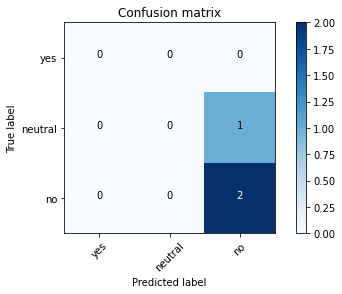

In [88]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

cnf_matrix = confusion_matrix(ytrue, yhat, labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['yes','neutral', 'no'],normalize= False,  title='Confusion matrix')

In [89]:
accuracy_score(ytrue, yhat)


0.6666666666666666

In [92]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [95]:
sequence = []
sentence = []
threshold = 0.9
print(type(sequence))


def main2(sequence, sentence, seqLen):
    FIRST_TIME = True
    frame_height, frame_width = (720, 1280)
    source = WebcamSource(width=frame_width, height=frame_height)
    image_size = (frame_width, frame_height)
    count = 0

    # pseudo camera internals
    focal_length = frame_width

    landmarks = None
    smooth_left_depth = -1
    smooth_right_depth = -1
    smooth_factor = 0.1

    with mp_face_mesh.FaceMesh(
        static_image_mode=False,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5,
    ) as face_mesh:
        for idx, (frame, frame_rgb) in enumerate(source):
            results = face_mesh.process(frame_rgb)
            multi_face_landmarks = results.multi_face_landmarks

            if multi_face_landmarks:
                face_landmarks = results.multi_face_landmarks[0]
                landmarks = np.array(
                    [(lm.x, lm.y, lm.z)
                     for lm in face_landmarks.landmark]
                )
                landmarks = landmarks.T

                (
                    left_depth,
                    left_iris_size,
                    left_iris_landmarks,
                    left_eye_contours,
                ) = from_landmarks_to_depth(
                    frame_rgb,
                    landmarks[:, left_eye_landmarks_id],
                    image_size,
                    is_right_eye=False,
                    focal_length=focal_length,
                )

                (
                    right_depth,
                    right_iris_size,
                    right_iris_landmarks,
                    right_eye_contours,
                ) = from_landmarks_to_depth(
                    frame_rgb,
                    landmarks[:, right_eye_landmarks_id],
                    image_size,
                    is_right_eye=True,
                    focal_length=focal_length,
                )
                

                if smooth_right_depth < 0:
                    smooth_right_depth = right_depth
                else:
                    smooth_right_depth = (
                        smooth_right_depth * (1 - smooth_factor)
                        + right_depth * smooth_factor
                    )

                if smooth_left_depth < 0:
                    smooth_left_depth = left_depth
                else:
                    smooth_left_depth = (
                        smooth_left_depth * (1 - smooth_factor)
                        + left_depth * smooth_factor
                    )

            if landmarks is not None:

                landmark_idx = 0
                df_headers = []
                df_values = []

                # add eye contours to dataframe
                eye_landmarks = np.concatenate(
                    [
                        right_eye_contours[0:17],
                        left_eye_contours[0:17],
                    ]
                )

                # add iris landmarks to dataframe
                iris_landmarks = np.concatenate(
                    [
                        right_iris_landmarks,
                        left_iris_landmarks,
                    ]
                )
                for landmark in iris_landmarks:

                    __add_landmark_to_df(
                        landmark, landmark_idx, df_headers, df_values)

                    landmark_idx += 1

                for landmark in eye_landmarks:

                    __add_landmark_to_df(
                        landmark, landmark_idx, df_headers, df_values)

                    landmark_idx += 1

                # add subset of facemesh to dataframe
                for ii in POINTS_IDX:

                    landmark = (landmarks[0, ii],
                                landmarks[1, ii], landmarks[2, ii])
                    __add_landmark_to_df(
                        landmark, landmark_idx, df_headers, df_values)

                    landmark_idx += 1

                 # Export to CSV
#                         with open(outputfilepath, mode='a', newline='') as f:
#                             csv_writer = csv.writer(
#                                 f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                             if (FIRST_TIME):
#                                 csv_writer.writerow(df_headers)
#                                 FIRST_TIME = False
#                             csv_writer.writerow(df_values)

                # draw subset of facemesh
                for ii in POINTS_IDX:
                    pos = (np.array(image_size) *
                           landmarks[:2, ii]).astype(np.int32)
                    frame = cv2.circle(frame, tuple(
                        pos), LARGE_CIRCLE_SIZE, GREEN, -1)

                # draw eye contours
                eye_landmarks = np.concatenate(
                    [
                        right_eye_contours,
                        left_eye_contours,
                    ]
                )
                for landmark in eye_landmarks:
                    pos = (np.array(image_size) *
                           landmark[:2]).astype(np.int32)
                    frame = cv2.circle(frame, tuple(
                        pos), SMALL_CIRCLE_SIZE, RED, -1)

                # draw iris landmarks
                iris_landmarks = np.concatenate(
                    [
                        right_iris_landmarks[0:3],
                        left_iris_landmarks[0:5],
                    ]
                )
                for landmark in iris_landmarks:
                    pos = (np.array(image_size) *
                           landmark[:2]).astype(np.int32)
                    frame = cv2.circle(frame, tuple(
                        pos), SMALL_CIRCLE_SIZE, YELLOW, -1)

                # write depth values into frame
                depth_string = "{:.2f}cm, {:.2f}cm".format(
                    smooth_left_depth / 10, smooth_right_depth / 10
                )
                frame = cv2.putText(
                    frame,
                    depth_string,
                    (50, 50),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1,
                    GREEN,
                    2,
                    cv2.LINE_AA,
                )
                
                res = np.array(df_values)
                keypoints = compareIrisLandmarks(res[15:30], res[81:108], res[132:138]) + compareIrisLandmarks(res[0:15], res[30:57], res[138:])
                ##THESE ARE OLD VERSIONS
#                 keypoints = compareIrisLandmarks(keyLandmarks[15:30], keyLandmarks[81:132], keyLandmarks[132:138]) + compareIrisLandmarks(keyLandmarks[0:15], keyLandmarks[30:81], keyLandmarks[138:])
#                 keypoints = compareMidPointToLandMarks(df_values[0:3], df_values[132:])
                sequence.append(keypoints)
                sequence = sequence[-seqLen:]
                if len(sequence) == seqLen:
                    res = model.predict(np.expand_dims(sequence, axis=0))[0]
                    
                    print(res)

                    #3. Viz logic
                    if res[np.argmax(res)] > threshold: 
                        if len(sentence) > 0: 
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

                    if len(sentence) > 5: 
                        sentence = sentence[-5:]

                    # Viz probabilities
                    frame = prob_viz(res, actions, frame, colors)
                    source.show(frame)


<class 'list'>


In [96]:
s= []
s1 = []
main2(s, s1, 49)

[4.33e-02 9.57e-01 7.02e-07]
[1.06e-02 9.89e-01 9.53e-06]
[3.37e-03 9.97e-01 5.18e-05]
[3.99e-04 9.99e-01 8.59e-04]
[4.56e-04 9.97e-01 2.27e-03]
[3.17e-05 9.90e-01 9.62e-03]
[1.31e-29 1.01e-12 1.00e+00]
[7.34e-16 1.21e-03 9.99e-01]
[4.70e-11 2.94e-02 9.71e-01]
[7.82e-08 1.68e-01 8.32e-01]
[1.77e-04 3.58e-01 6.42e-01]
[0.01 0.35 0.64]
[0.07 0.4  0.53]
[0.11 0.43 0.46]
[0.14 0.43 0.43]
[0.14 0.44 0.42]
[0.15 0.44 0.41]
[0.15 0.44 0.41]
[0.15 0.44 0.4 ]
[0.15 0.44 0.4 ]
[0.15 0.44 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[0.15 0.45 0.4 ]
[

In [47]:
s= []
s1 = []
main2(s, s1)

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
no
yes
no
yes
no
yes
yes
no
yes
yes
yes
yes
yes
no
yes
yes
no
yes
yes
yes
no
yes
yes
no
yes
no
yes
yes
yes
yes
yes
yes
yes
no
yes
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
